In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.cluster import KMeans

# I. Import des données

In [2]:
df = pd.read_excel("projet 5/Online Retail.xlsx")

In [3]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [4]:
df.shape

(541909, 8)

In [5]:
df = df[~df['CustomerID'].isna()]
df = df.reset_index()
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['TotalPrice2'] = df['Quantity'] * df['UnitPrice']

In [6]:
df.shape

(406829, 11)

Text(0,0.5,'Frequency')

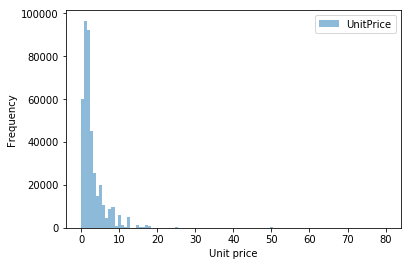

In [7]:
df.loc[df['UnitPrice'] < 80, ['UnitPrice']].astype(float).plot.hist(bins=100, alpha=0.5)
plt.xlabel('Unit price')
plt.ylabel('Frequency')

Text(0,0.5,'Probability')

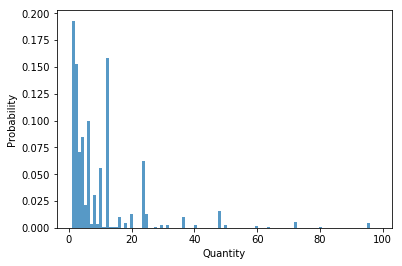

In [8]:
plt.hist(df.loc[(df['Quantity'] > 0) & (df['Quantity'] < 100), ['Quantity']].astype(float).values.ravel(), 100, density=True, alpha=0.75)
plt.xlabel('Quantity')
plt.ylabel('Probability')

In [9]:
df[df['UnitPrice'] == max(df['UnitPrice'])]

index InvoiceNo StockCode Description  Quantity         InvoiceDate  \
159240  222681   C556445         M      Manual        -1 2011-06-10 15:31:00   

        UnitPrice  CustomerID         Country  TotalPrice  TotalPrice2  
159240    38970.0     15098.0  United Kingdom    -38970.0     -38970.0

In [10]:
df[df['CustomerID'] == 15098]

index InvoiceNo StockCode                     Description  Quantity  \
159229  222670    556442     22502      PICNIC BASKET WICKER SMALL        60   
159239  222680    556444     22502  PICNIC BASKET WICKER 60 PIECES        60   
159240  222681   C556445         M                          Manual        -1   
159241  222682    556446     22502  PICNIC BASKET WICKER 60 PIECES         1   
159251  222692   C556448     22502      PICNIC BASKET WICKER SMALL       -60   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
159229 2011-06-10 15:22:00       4.95     15098.0  United Kingdom       297.0   
159239 2011-06-10 15:28:00     649.50     15098.0  United Kingdom     38970.0   
159240 2011-06-10 15:31:00   38970.00     15098.0  United Kingdom    -38970.0   
159241 2011-06-10 15:33:00     649.50     15098.0  United Kingdom       649.5   
159251 2011-06-10 15:39:00       4.95     15098.0  United Kingdom      -297.0   

        TotalPrice2  
159229        297.0  
159239      38970.0  
159240     -38970.0  
159241        649.5  
159251       -297.0

# II. Features engineering

## a. Détection des achats les plus fréquents

In [11]:
encoder = CountVectorizer()
df_encoded = encoder.fit_transform(df['Description'])

In [12]:
freq = sum(df_encoded.toarray())

In [13]:
n_occurences = 500
df_encoded = pd.DataFrame(df_encoded.toarray()[:, freq>n_occurences])

In [14]:
df_encoded.columns = np.asarray(encoder.get_feature_names())[freq>500]

In [15]:
to_delete = ['10', '11', '12', '20', '24', '36', '3d', '50', '60', '72', 'am', 'and', 'black', 'blue', 'deluxe', 'for', 'giant', 'green', 'grey', 'grow', 'happy', 'hot', 'in', 'it', 'making', 'medium', 'memo', 'mini', 'mint', 'multi', 'new', 'night', 'no', 'of', 'of4', 'on', 'one', 'or', 'orange', 'over', 'pink', 'please', 'red',  'rose', 'size', 'small', 'so', 'soft', 'sweet', 'tall', 'the', 'tidy', 'tier', 'tonic', 'top', 'traditional', 'triple', 'union', 'up', 'welcome', 'white', 'word', 'world', 'yellow', 'you', 'your']

In [16]:
df_encoded = df_encoded.drop(columns=to_delete)

In [17]:
df = pd.concat([df, df_encoded], axis=1, join='inner')

In [18]:
df

index InvoiceNo StockCode                          Description  \
0            0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1            1    536365     71053                  WHITE METAL LANTERN   
2            2    536365    84406B       CREAM CUPID HEARTS COAT HANGER   
3            3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4            4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   
5            5    536365     22752         SET 7 BABUSHKA NESTING BOXES   
6            6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER   
7            7    536366     22633               HAND WARMER UNION JACK   
8            8    536366     22632            HAND WARMER RED POLKA DOT   
9            9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT   
10          10    536367     22745           POPPY'S PLAYHOUSE BEDROOM    
11          11    536367     22748            POPPY'S PLAYHOUSE KITCHEN   
12          12    536367     22749    FELTCRAFT PRINCESS CHARLOTTE DOLL   
13          13    536367     22310              IVORY KNITTED MUG COSY    
14          14    536367     84969   BOX OF 6 ASSORTED COLOUR TEASPOONS   
15          15    536367     22623        BOX OF VINTAGE JIGSAW BLOCKS    
16          16    536367     22622       BOX OF VINTAGE ALPHABET BLOCKS   
17          17    536367     21754             HOME BUILDING BLOCK WORD   
18          18    536367     21755             LOVE BUILDING BLOCK WORD   
19          19    536367     21777          RECIPE BOX WITH METAL HEART   
20          20    536367     48187                  DOORMAT NEW ENGLAND   
21          21    536368     22960             JAM MAKING SET WITH JARS   
22          22    536368     22913          RED COAT RACK PARIS FASHION   
23          23    536368     22912       YELLOW COAT RACK PARIS FASHION   
24          24    536368     22914         BLUE COAT RACK PARIS FASHION   
25          25    536369     21756             BATH BUILDING BLOCK WORD   
26          26    536370     22728            ALARM CLOCK BAKELIKE PINK   
27          27    536370     22727            ALARM CLOCK BAKELIKE RED    
28          28    536370     22726           ALARM CLOCK BAKELIKE GREEN   
29          29    536370     21724      PANDA AND BUNNIES STICKER SHEET   
...        ...       ...       ...                                  ...   
406799  541879    581585     22726           ALARM CLOCK BAKELIKE GREEN   
406800  541880    581585     22727            ALARM CLOCK BAKELIKE RED    
406801  541881    581585     16016          LARGE CHINESE STYLE SCISSOR   
406802  541882    581585     21916      SET 12 RETRO WHITE CHALK STICKS   
406803  541883    581585     84692          BOX OF 24 COCKTAIL PARASOLS   
406804  541884    581585     84946         ANTIQUE SILVER T-LIGHT GLASS   
406805  541885    581585     21684     SMALL MEDINA STAMPED METAL BOWL    
406806  541886    581585     22398           MAGNETS PACK OF 4 SWALLOWS   
406807  541887    581585     23328   SET 6 SCHOOL MILK BOTTLES IN CRATE   
406808  541888    581585     23145       ZINC T-LIGHT HOLDER STAR LARGE   
406809  541889    581585     22466       FAIRY TALE COTTAGE NIGHT LIGHT   
406810  541890    581586     22061  LARGE CAKE STAND  HANGING STRAWBERY   
406811  541891    581586     23275     SET OF 3 HANGING OWLS OLLIE BEAK   
406812  541892    581586     21217        RED RETROSPOT ROUND CAKE TINS   
406813  541893    581586     20685                DOORMAT RED RETROSPOT   
406814  541894    581587     22631             CIRCUS PARADE LUNCH BOX    
406815  541895    581587     22556       PLASTERS IN TIN CIRCUS PARADE    
406816  541896    581587     22555            PLASTERS IN TIN STRONGMAN   
406817  541897    581587     22728            ALARM CLOCK BAKELIKE PINK   
406818  541898    581587     22727            ALARM CLOCK BAKELIKE RED    
406819  541899    581587     22726           ALARM CLOCK BAKELIKE GREEN   
406820  541900    581587     22730

## b. RFM

In [19]:
NOW = datetime(2019,1,1)

On calcule le nombre de jours entre chaque commandes

In [20]:
df_reduced = df.loc[:, ['CustomerID', 'InvoiceNo', 'InvoiceDate']].drop_duplicates() \
                                                            .sort_values(['CustomerID', 'InvoiceDate'])
penality = 1000
cond = df_reduced.CustomerID != df_reduced.CustomerID.shift(1)
df_reduced['DaysFromLastOrder'] = (df_reduced.InvoiceDate - df_reduced.InvoiceDate.shift(1))
df_reduced['DaysFromLastOrder'] = df_reduced['DaysFromLastOrder'].apply(lambda x: x.days)
df_reduced.loc[cond, 'DaysFromLastOrder'] = penality

In [21]:
df = pd.merge(df, df_reduced.loc[:, ['CustomerID', 'InvoiceNo', 'DaysFromLastOrder']], on=['CustomerID', 'InvoiceNo'])

On calcule la RFM + d'autres statistiques

In [62]:
rfmTable = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW - x.max()).days, 
                                         'InvoiceNo': lambda x: len(x.drop_duplicates()),
                                         'TotalPrice': lambda x: x.sum(), 
                                         'TotalPrice2': lambda x: x.mean(), 
                                         'DaysFromLastOrder': lambda x: x[x > 0].mean()})
rfmTable['InvoiceDate'] = rfmTable['InvoiceDate'].astype(int)
rfmTable.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'TotalPrice': 'monetary_value',
                         'TotalPrice2': 'average_value',
                         'DaysFromLastOrder': 'average_days_between_orders'}, inplace=True)

In [23]:
rfmTable.head(10)

recency  frequency  monetary_value  average_value  \
CustomerID                                                      
12346.0        2904          2            0.00       0.000000   
12347.0        2581          7         4310.00      23.681319   
12348.0        2654          4         1797.24      57.975484   
12349.0        2597          1         1757.55      24.076027   
12350.0        2889          1          334.40      19.670588   
12352.0        2615         11         1545.41      16.267474   
12353.0        2783          1           89.00      22.250000   
12354.0        2811          1         1079.40      18.610345   
12355.0        2793          1          459.40      35.338462   
12356.0        2601          3         2811.43      47.651356   

            average_days_between_orders  
CustomerID                               
12346.0                     1000.000000  
12347.0                      225.483516  
12348.0                      583.967742  
12349.0                     1000.000000  
12350.0                     1000.000000  
12352.0                      235.888889  
12353.0                     1000.000000  
12354.0                     1000.000000  
12355.0                     1000.000000  
12356.0                      646.169492

In [24]:
rfmTable.shape

(4372, 5)

In [63]:
df_ohe = pd.concat([df['CustomerID'], df.iloc[:, 11:-1]], axis=1, join='inner')

In [64]:
rfmTable = pd.merge(rfmTable, df_ohe.groupby('CustomerID').agg(np.sum), on='CustomerID')

In [65]:
rfmTable = rfmTable[rfmTable['monetary_value'] != 0]

# III. Réduction dimensionnelle

In [28]:
pca = PCA(n_components=6)
pca.fit(rfmTable.iloc[:,6:].values)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
print(pca.explained_variance_ratio_)

[0.64406259 0.07188196 0.04026014 0.02119014 0.017731   0.0142804 ]


In [30]:
sum(pca.explained_variance_ratio_)

0.8094062301536948

In [66]:
reduced_matrix = pca.transform(rfmTable.iloc[:,6:].values)

In [67]:
reduced_matrix.shape

(4364, 6)

In [68]:
rfmTable = rfmTable.reset_index()

In [69]:
df_reduced = pd.concat([rfmTable.iloc[:,0:6], pd.DataFrame(reduced_matrix)], axis=1, join='inner')

# IV. Clusterisation

In [35]:
clusters = np.linspace(4,20,17).astype(int)

In [70]:
df_reduced['average_days_between_orders'] = df_reduced['average_days_between_orders'].apply(lambda x: penality if np.isnan(x) else x)

In [71]:
#standardisation of the data
scaler = StandardScaler()
df_reduced_norm = pd.DataFrame(scaler.fit_transform(df_reduced.iloc[:, 1:]))
df_reduced_norm.columns = df_reduced.columns[1:]

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [38]:
km = KMeans()
grid = GridSearchCV(km, {'n_clusters':clusters}, cv=5)
grid.fit(df_reduced_norm.values)

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_clusters': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
pd.DataFrame(grid.cv_results_)

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.105443      0.015365         0.000491        0.000011   
1        0.117009      0.012890         0.000521        0.000022   
2        0.149322      0.032021         0.000599        0.000147   
3        0.141685      0.015736         0.000522        0.000014   
4        0.153581      0.012300         0.000510        0.000009   
5        0.171661      0.024144         0.000560        0.000030   
6        0.178283      0.017167         0.000546        0.000011   
7        0.188522      0.025215         0.000561        0.000004   
8        0.205545      0.025520         0.000579        0.000017   
9        0.206914      0.017349         0.000558        0.000009   
10       0.206227      0.017305         0.000567        0.000014   
11       0.245953      0.028517         0.000589        0.000015   
12       0.243700      0.015989         0.000585        0.000008   
13       0.276800      0.027103         0.000595        0.000009   
14       0.273885      0.009281         0.000584        0.000008   
15       0.304296      0.028625         0.000596        0.000006   
16       0.309084      0.017830         0.000593        0.000005   

   param_n_clusters              params  split0_test_score  split1_test_score  \
0                 4   {'n_clusters': 4}       -6302.825532       -7389.611963   
1                 5   {'n_clusters': 5}       -6457.850203       -6637.953073   
2                 6   {'n_clusters': 6}       -6022.502938       -7259.280324   
3                 7   {'n_clusters': 7}       -5696.341942       -6932.395437   
4                 8   {'n_clusters': 8}       -5631.053647       -7038.908978   
5                 9   {'n_clusters': 9}       -5408.943942       -5936.472054   
6                10  {'n_clusters': 10}       -5141.950575       -5940.588724   
7                11  {'n_clusters': 11}       -5018.089881       -5944.400497   
8                12  {'n_clusters': 12}       -4348.462946       -5592.662118   
9                13  {'n_clusters': 13}       -4297.028143       -5452.290508   
10               14  {'n_clusters': 14}       -4251.673968       -4999.798573   
11               15  {'n_clusters': 15}       -4030.011942       -5005.611943   
12               16  {'n_clusters': 16}       -4198.340004       -4737.762630   
13               17  {'n_clusters': 17}       -3918.144452       -4633.087539   
14               18  {'n_clusters': 18}       -3851.671804       -4511.022018   
15               19  {'n_clusters': 19}       -3852.390304       -4490.204494   
16               20  {'n_clusters': 20}       -3675.822116       -4434.780293   

    split2_test_score  split3_test_score       ...         mean_test_score  \
0        -9206.473592       -4869.293810       ...            -7702.168496   
1        -8435.279120       -4306.538634       ...            -7315.872711   
2        -8703.176619       -4376.200775       ...            -7334.481159   
3        -8276.526099       -4046.206691       ...            -6892.745605   
4        -7774.246777       -4353.673261       ...            -6978.965950   
5        -7777.400427       -3623.366603       ...            -6279.676197   
6        -7484.192248       -3877.080572       ...            -6366.047178   
7        -7267.293857       -3332.275124       ...            -6089.271752   
8        -7344.410130       -3553.997655       ...            -5886.181669   
9        -6518.155504       -3158.109504       ...            -5577.480036   
10       -5967.528752       -3199.003783       ...            -5297.089381   
11       -6053.429938       -3180.546437       ...            -5345.617264   
12       -6191.384878       -3130.809827       ...            -5307.214362   
13       -5880.136065       -2836.614115       ...            -5008.366236   
14       -5433.993139       -2964.496205       ...            -4900.148748   
15       -5923.022889       -2939.583030       ...            -5018.1617

Text(0,0.5,'Mean Score')

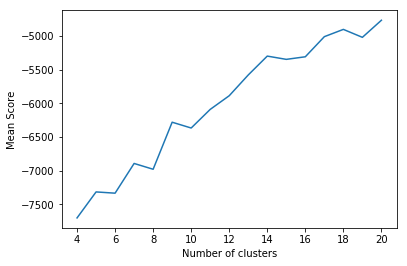

In [40]:
plt.plot(clusters, grid.cv_results_['mean_test_score'])
plt.xlabel('Number of clusters')
plt.ylabel('Mean Score')

In [41]:
km = KMeans(n_clusters=7)
km.fit(df_reduced_norm.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [72]:
rfmTable['interest_cluster'] = km.predict(df_reduced_norm.values)
df_reduced['interest_cluster'] = km.predict(df_reduced_norm.values)
df_reduced_norm['interest_cluster'] = km.predict(df_reduced_norm.values)
df_reduced_norm.insert(0, 'CustomerID', pd.DataFrame(df_reduced['CustomerID'].values))

In [43]:
grouped = rfmTable.groupby('interest_cluster').agg(np.mean)

In [44]:
cluster_words = []
columns = rfmTable.columns[6:-1]
grouped.iloc[:, 6:].apply(lambda x: cluster_words.append(columns[x > 10]), axis=1)

interest_cluster
0    None
1    None
2    None
3    None
4    None
5    None
6    None
dtype: object

In [45]:
grouped

CustomerID      recency   frequency  monetary_value  \
interest_cluster                                                          
0                 15279.782158  2617.955394    7.281120     2267.792294   
1                 17841.000000  2580.000000  169.000000    40340.780000   
2                 15276.445731  2636.338640    1.738061      572.384357   
3                 13918.333333  2580.666667  168.666667    73525.040000   
4                 15356.282051  2839.922009    1.591880      405.232458   
5                 15499.376147  2588.596330   30.128440    14268.585505   
6                 15353.800000  2587.400000   57.200000   192103.854000   

                  average_value  average_days_between_orders  acapulco  \
interest_cluster                                                         
0                     25.316859                   277.432975  0.299793   
1                      5.053336                     3.145754  3.000000   
2                     36.640355                   867.340777  0.060058   
3                     13.308872                     7.233715  5.000000   
4                     22.009957                   878.504301  0.096154   
5                     41.090519                    95.305847  1.568807   
6                    299.859911                    37.391741  1.400000   

                    acrylic    airline      alarm    ...          wine  \
interest_cluster                                     ...                 
0                  0.386929   0.244295   1.344398    ...      0.213174   
1                 72.000000  32.000000  68.000000    ...      2.000000   
2                  0.056440   0.065847   0.180174    ...      0.039074   
3                 13.333333  19.666667  27.666667    ...      6.333333   
4                  0.059829   0.076923   0.139957    ...      0.048077   
5                  1.504587   1.302752   4.614679    ...      1.174312   
6                  2.600000   0.000000   6.400000    ...      4.200000   

                       wire        with       wood      wooden    woodland  \
interest_cluster                                                             
0                  0.380187    2.296162   1.588174    3.294606    1.531120   
1                 53.000000  153.000000  90.000000  285.000000  115.000000   
2                  0.086107    0.659913   0.347323    1.004342    0.430535   
3                 12.666667   86.333333  72.000000  185.666667   41.333333   
4                  0.072650    0.467949   0.309829    0.513889    0.184829   
5                  1.238532    7.880734   4.908257   10.018349    8.825688   
6                  1.400000   25.200000   8.200000   10.200000   28.400000   

                       wrap     wreath    writing       zinc  
interest_cluster                                              
0                  2.194502   0.407158   0.155602   1.341286  
1                 49.000000  46.000000   4.000000  96.000000  
2                  0.654124   0.178726   0.070188   0.387844  
3                 54.000000  20.666667  12.666667  52.333333  
4                  0.267094   0.030983   0.025641   0.190171  
5                  5.834862   0.669725   0.467890   4.559633  
6                 11.000000   2.200000   0.000000   8.800000  

[7 rows x 476 columns]

In [46]:
rfmTable.loc[:, ['CustomerID', 'interest_cluster']].groupby('interest_cluster').agg(['count'])

CustomerID
                      count
interest_cluster           
0                      1928
1                         1
2                      1382
3                         3
4                       936
5                       109
6                         5

In [47]:
cluster_words

[Index(['bag', 'set'], dtype='object'),
 Index(['acrylic', 'airline', 'alarm', 'alphabet', 'animals', 'antique',
        'apple', 'apples', 'apron', 'art',
        ...
        'watering', 'wicker', 'wire', 'with', 'wood', 'wooden', 'woodland',
        'wrap', 'wreath', 'zinc'],
       dtype='object', length=312),
 Index([], dtype='object'),
 Index(['acrylic', 'airline', 'alarm', 'alphabet', 'angel', 'antique', 'apple',
        'apples', 'apron', 'art',
        ...
        'wicker', 'wire', 'with', 'wood', 'wooden', 'woodland', 'wrap',
        'wreath', 'writing', 'zinc'],
       dtype='object', length=363),
 Index([], dtype='object'),
 Index(['bag', 'bottle', 'box', 'bunting', 'cake', 'card', 'cases', 'charlotte',
        'christmas', 'design', 'dolly', 'glass', 'hanging', 'heart', 'holder',
        'jumbo', 'light', 'lunch', 'metal', 'pack', 'paisley', 'paper',
        'polkadot', 'regency', 'retrospot', 'set', 'sign', 'spaceboy', 'tea',
        'vintage', 'wooden'],
       dtype='obj

# V. Export

In [73]:
df_reduced_norm.to_csv("projet 5/Online_Retail_Cleaned.csv", index=False)